In [1]:
# Import required libraries
%load_ext autoreload
%autoreload 2

import pandas as pd
from plotUtils import PlotUtils
import numpy as np

In [2]:
datasetToName = {"ddg": "DuckDuckGo", "bing": "Bing", "google": "Google"}
modelToName = {"resnet": "ResNet", "alexnet": "AlexNet", "vgg": "VGG"}
balanceToName = {"20/80": "Strong", "30/70": "Medium",
                 "40/60": "Weak", "50/50": "Original"}

In [3]:
TITLE_PAD = 30
TITLE_DIM = 30
XY_LABEL_PAD = 23
XY_LABEL_DIM = 28
XY_TICKS_DIM = 28
GRID_ALPHA = 0.2
FILL_ALPHA = 0.05
BAR_WIDTH = 0.5
LEGEND_LOC = "upper right"
LEGEND_LABEL_DIM = 25
COLOR_SCHEME = ["#91C483", "#FF6464", "#FFE162", "#C67ACE"]

FIG_SIZE = (18, 8)
FIG_BG_COLOR = None # "w"
FIG_DPI = 500
FIG_BBOX = "tight"
FIG_PAD = .3
FIG_FORMATS = ["png", "pdf"]

In [4]:
plotter = PlotUtils(
    options={
        "titlePad": TITLE_PAD,
        "titleDim": TITLE_DIM,
        "xyLabelPad": XY_LABEL_PAD,
        "xyLabelDim": XY_LABEL_DIM,
        "xyTicksDim": XY_TICKS_DIM,
        "gridAlpha": GRID_ALPHA,
        "fillAlpha": FILL_ALPHA,
        "barWidth": BAR_WIDTH,
        "legendLoc": LEGEND_LOC,
        "legendLabelDim": LEGEND_LABEL_DIM,
        "colorScheme": COLOR_SCHEME,
        "figSize": FIG_SIZE,
        "figBGColor": FIG_BG_COLOR,
        "figDPI": FIG_DPI,
        "figBBox": FIG_BBOX,
        "figPad": FIG_PAD,
        "figFormats": FIG_FORMATS,
    }
)

In [5]:
eps01DF = pd.read_csv(
    "../FGSM_tuning/FGSM_Evaluations_0_1.csv", sep=",", index_col=0)
eps02DF = pd.read_csv(
    "../FGSM_tuning/FGSM_Evaluations_0_2.csv", sep=",", index_col=0)
eps025DF = pd.read_csv(
    "../FGSM_tuning/FGSM_Evaluations_0_25.csv", sep=",", index_col=0)
eps03DF = pd.read_csv(
    "../FGSM_tuning/FGSM_Evaluations_0_3.csv", sep=",", index_col=0)

In [6]:
eps01DF["asr"] = eps01DF.apply(lambda row: 1 - row["acc"], axis=1)
eps02DF["asr"] = eps02DF.apply(lambda row: 1 - row["acc"], axis=1)
eps025DF["asr"] = eps025DF.apply(lambda row: 1 - row["acc"], axis=1)
eps03DF["asr"] = eps03DF.apply(lambda row: 1 - row["acc"], axis=1)

In [7]:
eps01DF["sameModel"] = eps01DF.apply(lambda row: row["advModel"] == row["model"], axis=1)
eps02DF["sameModel"] = eps02DF.apply(lambda row: row["advModel"] == row["model"], axis=1)
eps025DF["sameModel"] = eps025DF.apply(lambda row: row["advModel"] == row["model"], axis=1)
eps03DF["sameModel"] = eps03DF.apply(lambda row: row["advModel"] == row["model"], axis=1)

In [8]:
all_eps = [eps01DF, eps02DF, eps025DF, eps03DF]

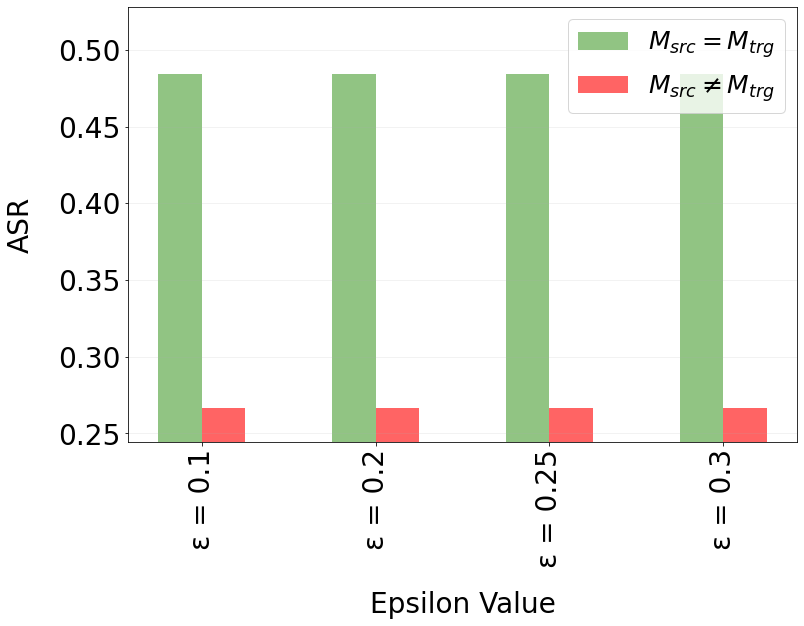

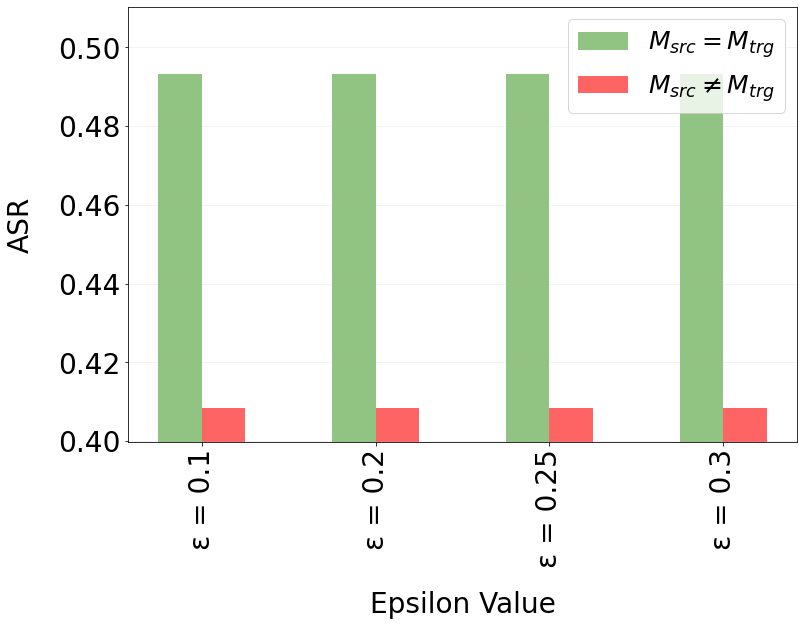

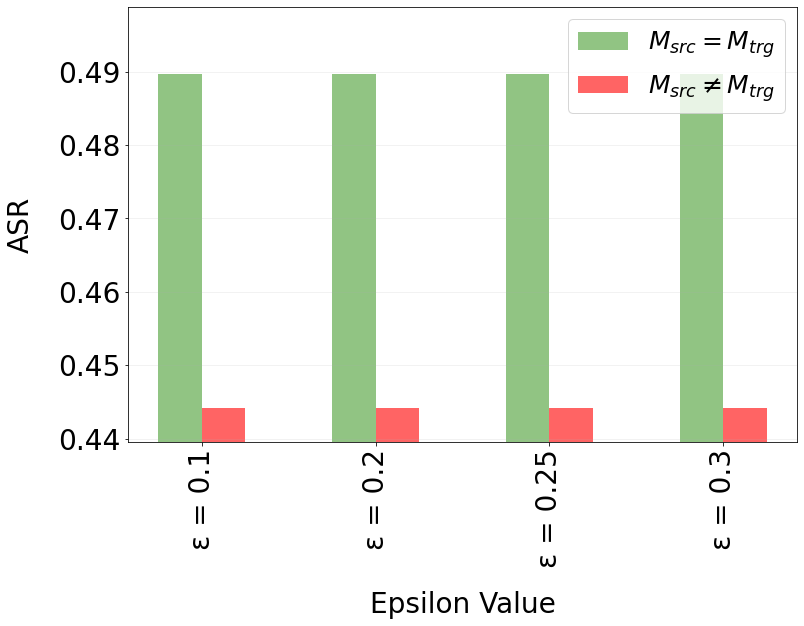

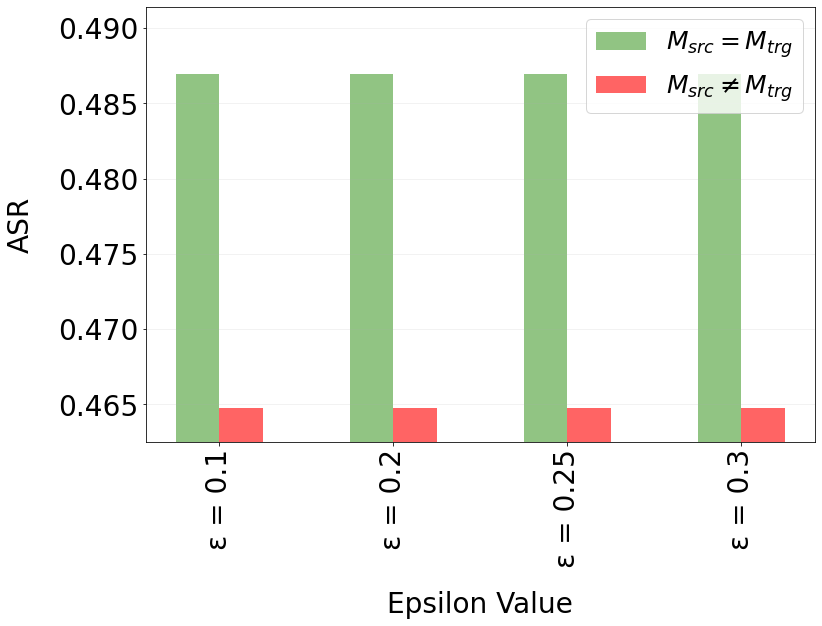

In [9]:
eps_values = ['ε = 0.1', 'ε = 0.2', 'ε = 0.25', 'ε = 0.3']

for eps in all_eps:
    sameModelDF = eps.groupby(["sameModel"]).mean()
    attacksValues = sameModelDF.groupby(["sameModel"])["asr"].apply(list)

    plotter.plotResults(
        figSize=(12, 8),
        x=np.arange(len(eps_values)),
        yArr=list(reversed(list(attacksValues))),
        yLabel="ASR",
        xLabel="Epsilon Value",
        legend=[r"$M_{src} = M_{trg}$", r"$M_{src} \neq M_{trg}$"],
        xTicks=eps_values,
        xTicksRotation=90,
        showGrid=True,
        gridAxis="y",
        style="bar",
        #yLim=[0, 0.8],
        saveTitle="eps",
    )

In [10]:
sameModelDF

,isMath,acc,precision,recall,f1,asr
sameModel,,,,,,
False,True,0.535260,0.584229,0.454039,0.426849,0.464740
True,True,0.513032,0.507051,0.386111,0.382090,0.486968
